# DIABETES PREDICTION (XGBOOST)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# CHECKING MISSING VALUES

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# CORELATIONS OF COLUMNS

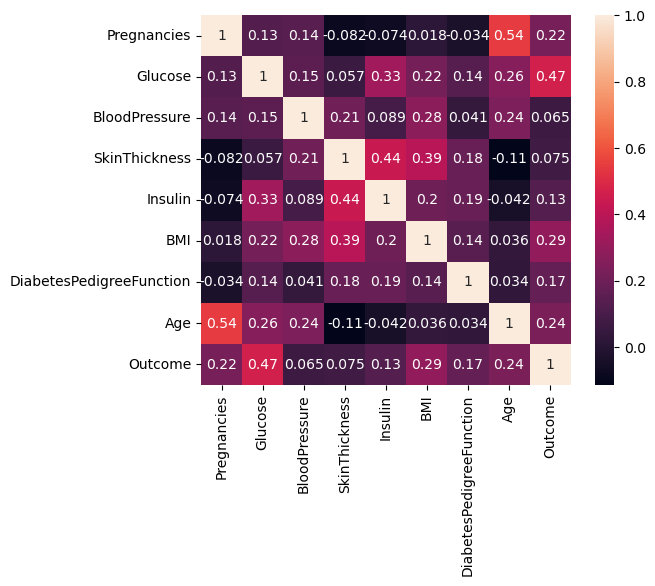

In [7]:
corr = df.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

# DROP LESS CORELATION COLUMNS

In [8]:
df.drop(["BloodPressure","SkinThickness"],axis=1,inplace=True)

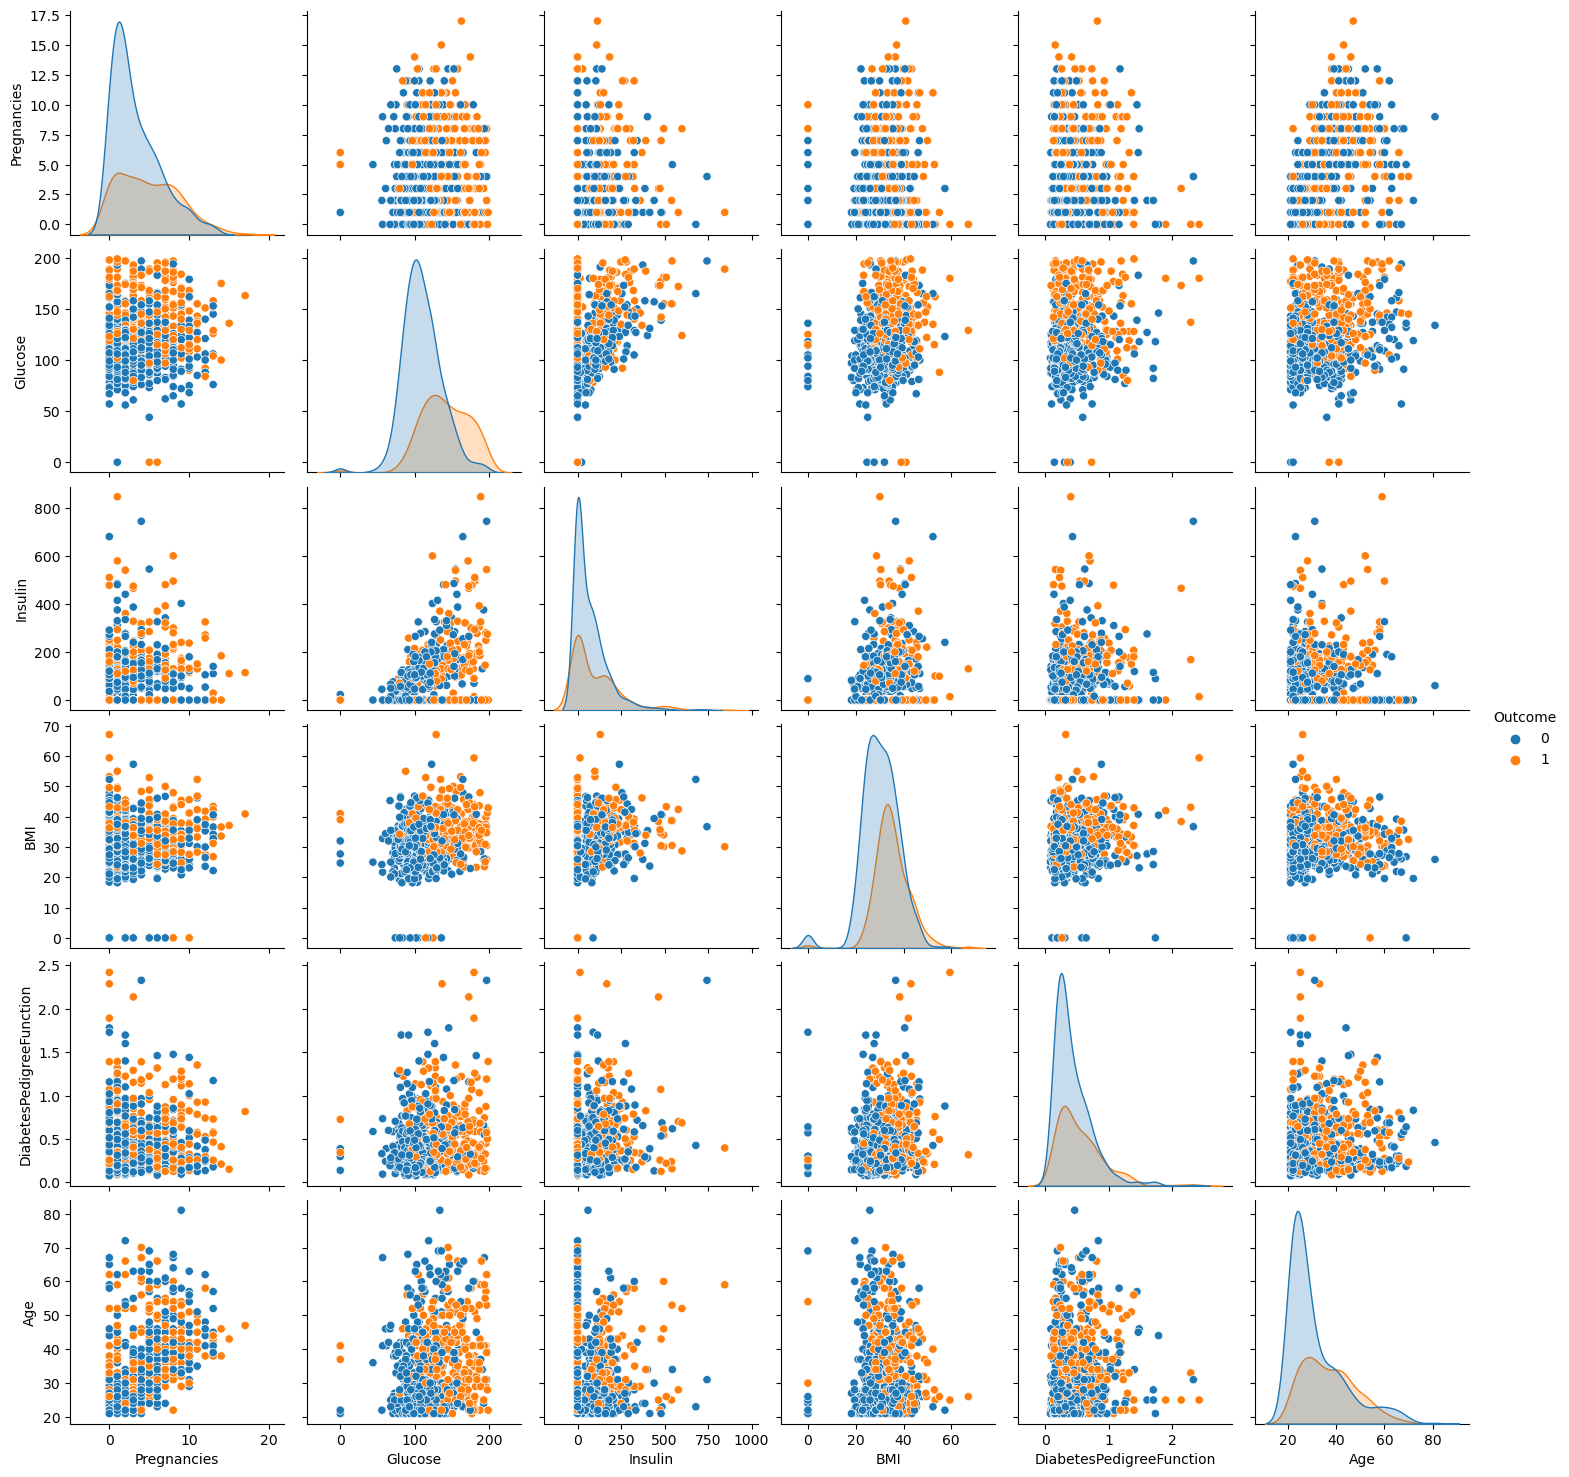

In [9]:
sns.pairplot(data=df,hue="Outcome")

# OUTLIERS DETECTION

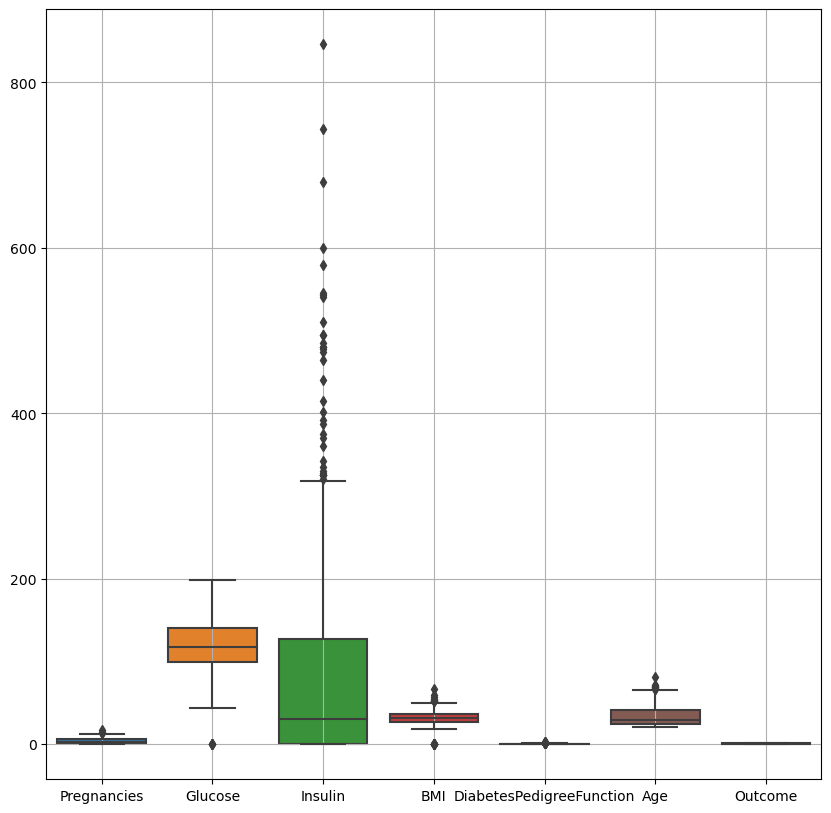

In [10]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.grid()

# OUTLIERS HANDALING

In [11]:
def whiskers(col):
    q1=np.quantile(col,0.25)
    q3=np.quantile(col,0.75)
    iqr=q3-q1
    uw=q3+1.5*iqr
    lw=q1-1.5*iqr
    return uw,lw

In [12]:
whiskers(df.Pregnancies)

(13.5, -6.5)

In [13]:
preg_outlier=df[df["Pregnancies"]>13.35].index
df.loc[preg_outlier,"Pregnancies"]=13.35


In [14]:
whiskers(df.Glucose)

(202.125, 37.125)

In [15]:
g_outlier=df[df["Glucose"]<37.125].index
df.loc[g_outlier,"Glucose"]=37.125

In [16]:
whiskers(df.Insulin)

(318.125, -190.875)

In [17]:
i_outlier=df[df["Insulin"]>318.125].index
df.loc[i_outlier,"Insulin"]=318.125

In [18]:
whiskers(df.BMI)

(50.550000000000004, 13.35)

In [19]:
bmi_outlier=df[df["BMI"]>50.550000000000004].index
df.loc[bmi_outlier,"BMI"]=50.55

In [20]:
bmi2_outlier=df[df["BMI"]<13.35].index
df.loc[bmi2_outlier,"BMI"]=13.35

In [21]:
whiskers(df.DiabetesPedigreeFunction)

(1.2, -0.32999999999999996)

In [22]:
dia_outlier=df[df["DiabetesPedigreeFunction"]>1.2].index
df.loc[dia_outlier,"DiabetesPedigreeFunction"]=1.2

In [23]:
whiskers(df.Age)

(66.5, -1.5)

In [24]:
age_outlier=df[df["Age"]>66.5].index
df.loc[age_outlier,"Age"]=66.5

# OUTLIERS HANDLED

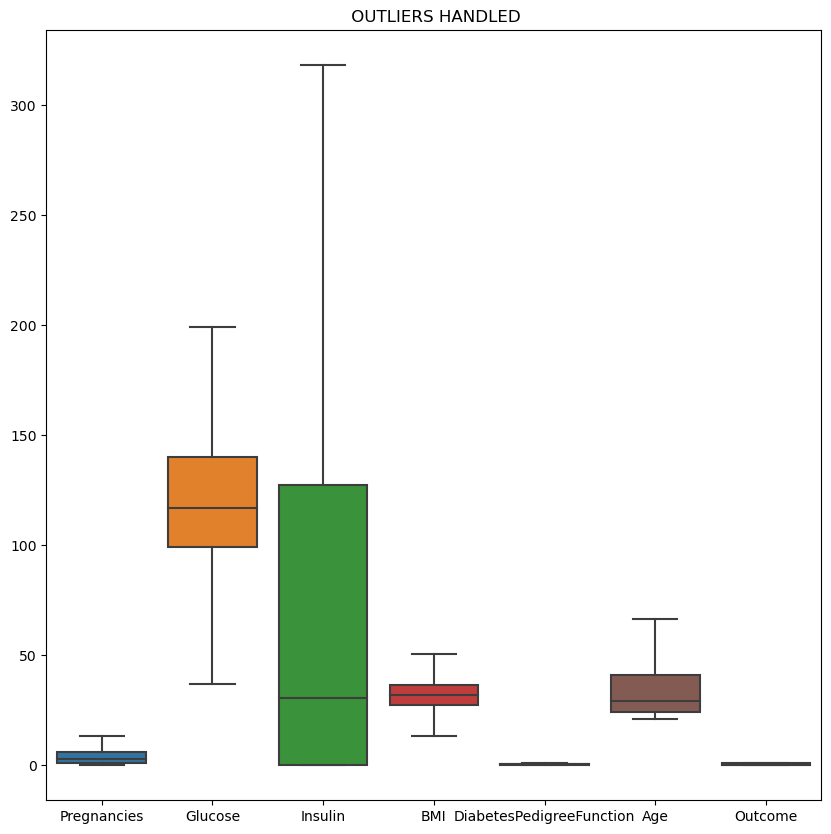

In [25]:
plt.figure(figsize=(10,10))
plt.title(" OUTLIERS HANDLED")
sns.boxplot(data=df)
plt.show()

# SKEW HANDLING

In [26]:
from scipy.stats import skew

Pregnancies
0.8489285996657551


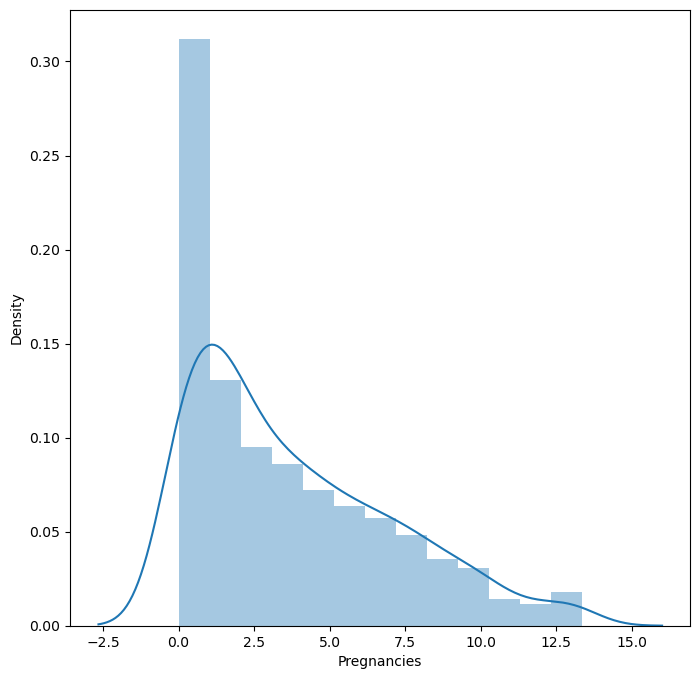

Glucose
0.41712947618943413


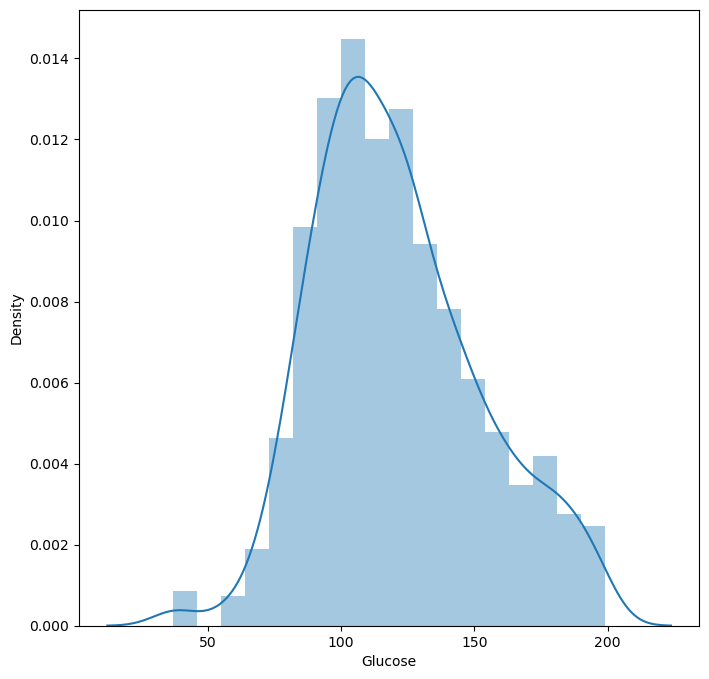

Insulin
1.1716041064979745


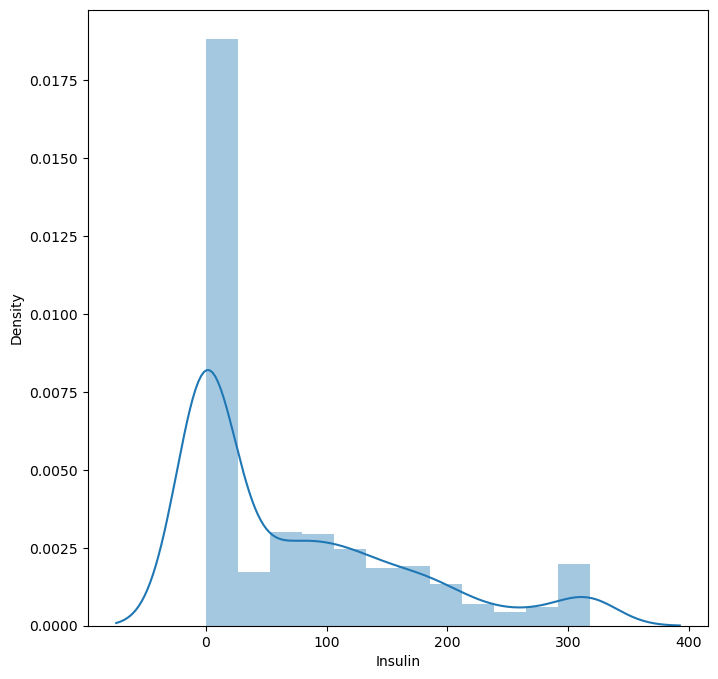

BMI
0.135543202913953


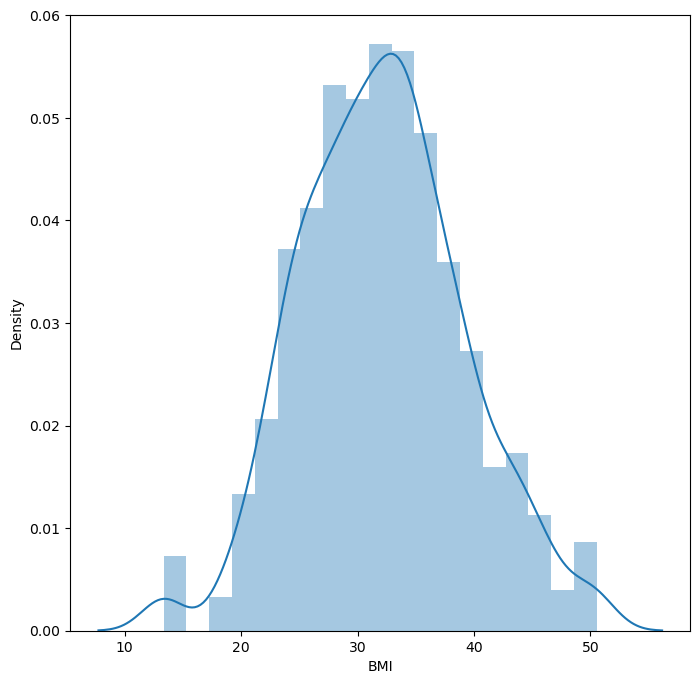

DiabetesPedigreeFunction
1.022425881265123


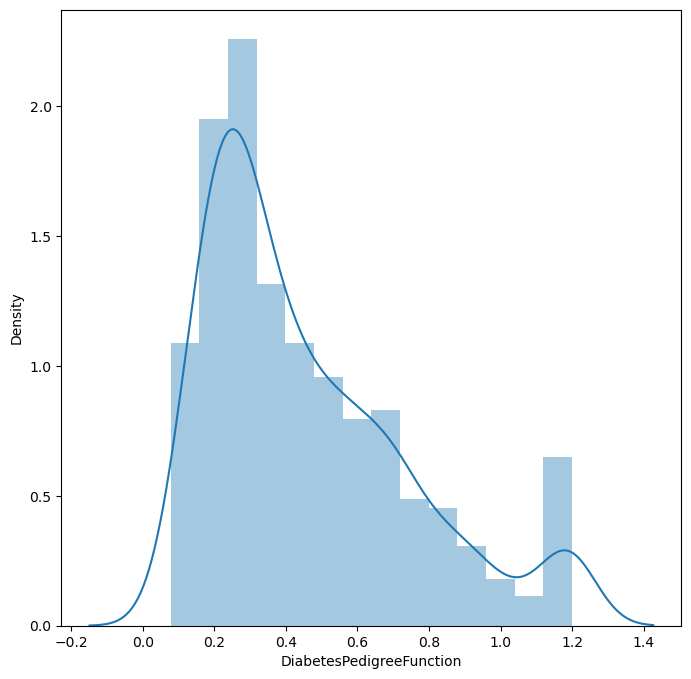

Age
1.0650848744423982


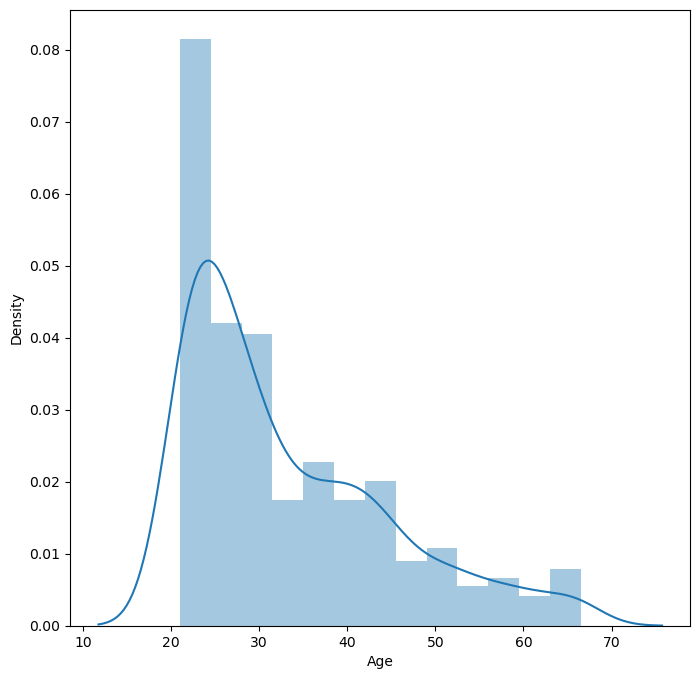

Outcome
0.6337757030614577


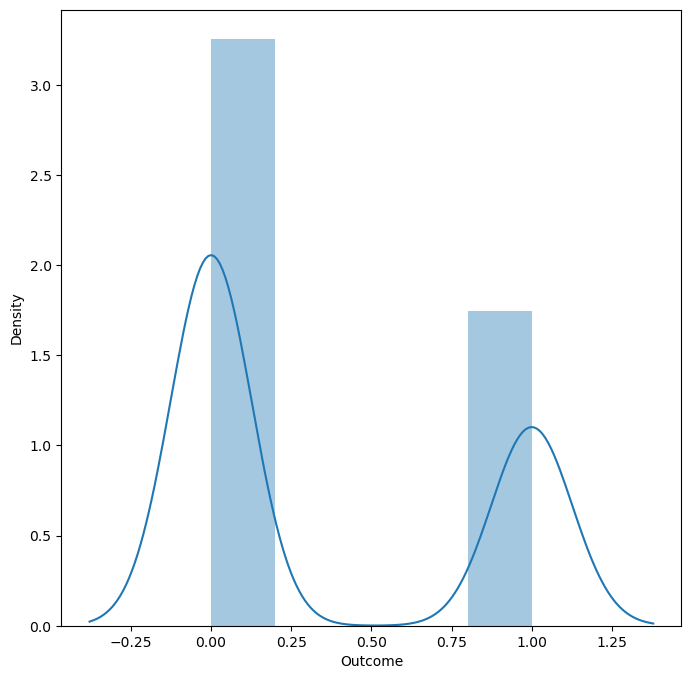

In [27]:
for i in df:
    print(i)
    print(skew(df[i]))
    plt.figure(figsize=(8,8))
    sns.distplot(df[i])
    plt.show()

In [28]:
df.Insulin=np.sqrt(df.Insulin)
df.Glucose=np.log(df.Glucose)
df.Age=np.log(df.Age)
df.BMI=np.log(df.BMI)
df.Pregnancies=np.sqrt(df.Pregnancies)
df.DiabetesPedigreeFunction=np.sqrt(df.DiabetesPedigreeFunction)

# SPLIT INTO FEATURES AND TARGET

In [29]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# SCALING

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)


# MODEL TRAINING

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=20)

In [33]:
def algorithm(algo):
    algo.fit(xtrain,ytrain)
    ypred=algo.predict(xtest)
    
    train=algo.score(xtrain,ytrain)
    test=algo.score(xtest,ytest)
    print(f"TrainingAccuracy: {train}\nTesting Accuracy: {test}\n\n")
    print(classification_report(ytest,ypred))
    print(f"ACCURACY:{accuracy_score(ytest,ypred)}")
    return algo
from sklearn.metrics import classification_report,accuracy_score   

In [34]:
from xgboost import XGBClassifier

In [35]:
xgb=algorithm(XGBClassifier())

TrainingAccuracy: 1.0
Testing Accuracy: 0.7402597402597403


              precision    recall  f1-score   support

           0       0.78      0.84      0.81       153
           1       0.64      0.54      0.58        78

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

ACCURACY:0.7402597402597403
